# 1단계 : 데이터 로딩 + EDA
## Data Load

In [19]:
import pandas as pd
![ ! -f  iris0.csv ]&&wget http://j.finfra.com/_file/iris0.csv
iris=pd.read_csv("iris0.csv")
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## EDA 

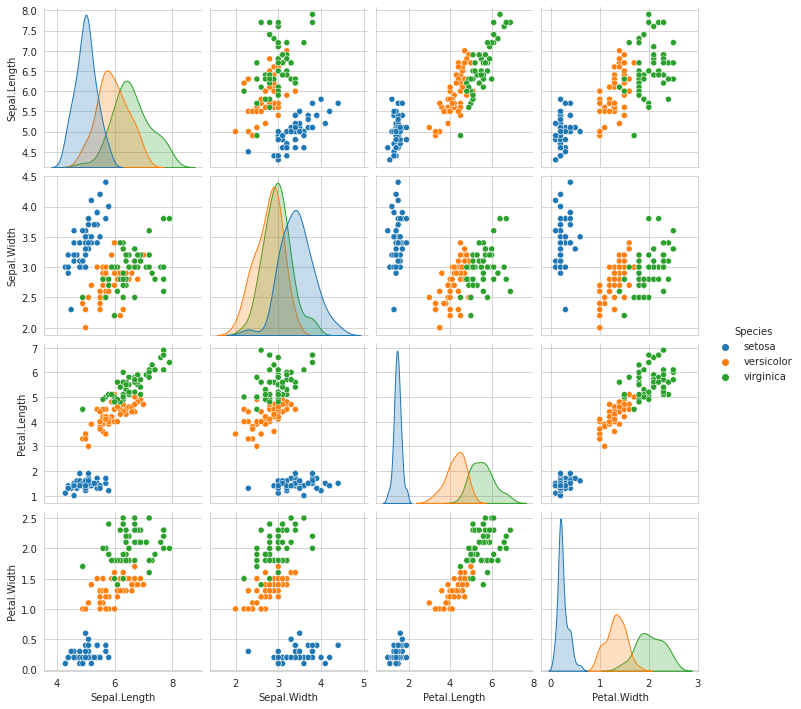

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid");
sns.pairplot(iris,hue="Species");
plt.show()

# 2단계 : 학습 데이터/ 평가 데이터로 분리

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,0:4], iris['Species'])
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(112, 4)

(38, 4)

(112,)

(38,)

# 3단계 : 학습(Training)


In [35]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1) # 기본값은 5
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# 4단계 : 평가


In [39]:
score = model.score(X_test, y_test) # score를 이용해 평가
print(score) #원래 잘 분리된 데이터라 높게 나왔다
pred_y=model.predict(X_test)
pred_y==y_test

0.9736842105263158


136     True
78      True
125     True
27      True
23      True
128     True
86      True
1       True
58      True
131     True
44      True
40      True
33      True
35      True
76      True
20      True
118     True
24      True
55      True
46      True
89      True
130     True
62      True
103     True
21      True
143     True
0       True
10      True
68      True
126     True
85      True
6       True
123     True
98      True
146     True
72      True
101     True
133    False
Name: Species, dtype: bool

# 5단계 : 모델 저장


In [41]:
from joblib import dump
dump(model,'model.joblib')

['model.joblib']

# 6단계 : 서비스 활용


In [42]:
from joblib import load
model_rebuild = load('model.joblib') 
model_rebuild.predict(X_test[0:1])

array(['virginica'], dtype=object)